In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pywt
from scipy.signal import chirp, spectrogram
from rich.console import Console

from llmodules import CWTx
console = Console()

In [2]:
%matplotlib widget

In [3]:
%load_ext autoreload
%autoreload 2

### The expression for a Morlet wavelet:

$$\Psi(t) = \exp^{-\frac{t^{2}}{2}} \cos (5t)$$

Ergo, the center frequency is: $5/2\pi \approx 0.8$ (Hz)

The Morlet wavelet has the interval [-4, 4] as effective support. Nearly 100% of the wavelet's energy is in the interval. Although [-4, 4] is the correct theoretical effective support, a wider effective support, [-8, 8], is used in the computation to provide more accurate results.

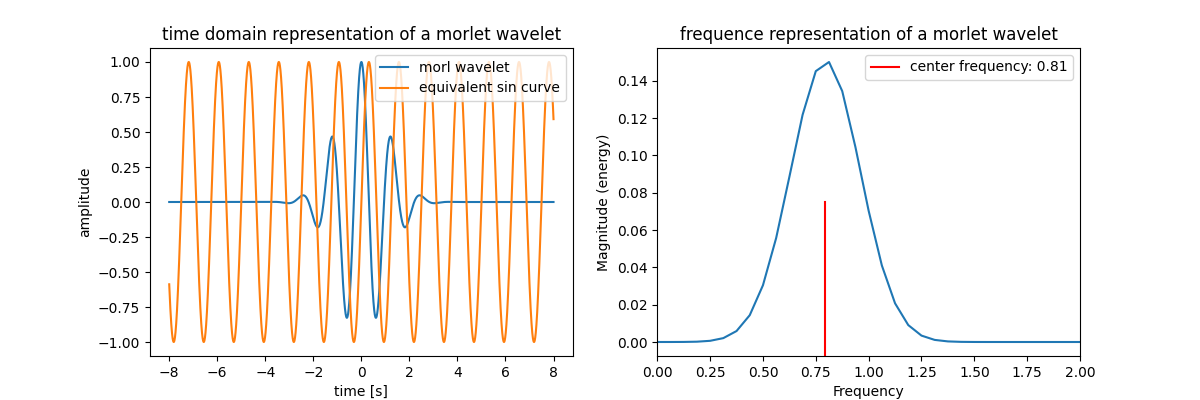

In [4]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# another example from Youtube
fs = 1000
t = np.arange(-8, 8, 1/fs)
y = np.exp(-(t**2/2)) * np.cos(5*t)

# compute the central frequency of the wavelet 
ct = pywt.central_frequency("morl", precision=8)

ax0.plot(t, y, label='morl wavelet')
ax0.set_title('time domain representation of a morlet wavelet')
ax0.plot(t, np.sin(2*np.pi* 0.8*t), label='equivalent sin curve')
ax0.set_xlabel('time [s]')
ax0.set_ylabel('amplitude')
ax0.legend()

ax1.magnitude_spectrum(y, fs)
ax1.set_title('frequence representation of a morlet wavelet')
ax1.axvline(x=5/(2*np.pi), ymin=0, ymax=0.5, color='red', label=f'center frequency: {ct:.2f}') 
ax1.set_xlim([0, 2])
ax1.legend()

plt.show()

*An example from [Pywavelet](https://pywavelets.readthedocs.io/en/latest/ref/cwt.html)*

- Only use the very below example to get a hint of the shape of wavelet coefficients
- **coefs**: The first axis of coefs corresponds to the scales. The remaining axes match the shape of data.
- **frequencies**: If the unit of sampling period are seconds and given, than frequencies are in hertz. Otherwise, a sampling period of 1 is assumed.

In [ ]:
# x = np.arange(512)
# y = np.sin(2*np.pi*x/32)
# coef, freqs=pywt.cwt(y, np.arange(1,129),'gaus1')
# plt.matshow(coef) # doctest: +SKIP
# plt.show() # doctest: +SKIP

In [ ]:
# coef.shape

In [ ]:
# coef[:, 0]

In [ ]:
# freqs.shape

#### Leslie defined funcs

In [5]:
def scale2freq(scales, dt):
    """ a direct func to get frequency values in Hertz
    Due to the base function has weird units;
    """
    
    freq_hz = pywt.scale2frequency(wavelet='morl', scale=scales)  / dt
    return freq_hz

In [6]:
def freq2scale(freqs, dt):
    """ input frequency output scales """
    
    freqs = freqs * dt
    return pywt.frequency2scale('morl', freqs)

### The use of Wavelet transform (morlet wavelet `'morl'`)

####  scale to frequency

The scale factor is inversely proportional to frequency, a constant proportionality called center frequency of the wavelet.
It can be better shown in equations:

$$
F_{eq} = \frac{C_{f}}{s \delta t}
$$

where

- $F_{eq}$ is the equivalent frequency;
- $C_{f}$ is the center frequency of the wavelet;
- $s$ is the scale;
- $\delta t$ is the sampling interval

### Exploring the relationship between `scales` and `frequency`

In [ ]:
test_dt =0.01

In [ ]:
# value1 = scale2freq(test_scales, test_dt)
# value1

In [ ]:
# value2 = pywt.central_frequency("morl", precision=8) / (test_scales * test_dt)
# value2

In [ ]:
# np.isclose(value1, value2)

In [ ]:
linear_range_scales = np.linspace(4, 128, num=20, endpoint=True)

# for example, use base=2
exp_range_scales = np.logspace(start=2,  stop=7, num=20, base=2, endpoint=True)

In [ ]:
linear_range_scales

In [ ]:
exp_range_scales

In [ ]:
# console.print("the linear scaled scales: \n", linear_range_scales)

In [ ]:
# console.print("the exponential scaled scales: \n", exp_range_scales)

In [ ]:
# computed frequencies
linear_freqs = scale2freq(linear_range_scales, test_dt)
exp_freqs = scale2freq(exp_range_scales, test_dt)

In [ ]:
len(exp_freqs)

In [ ]:
# plotting
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax0.plot(linear_range_scales, linear_freqs, 'o')
ax0.set_xlabel('scales')
ax0.set_ylabel('frequencies [Hz]')
ax0.set_title('a linear scheme to intialize scales')

ax1.plot(exp_range_scales, exp_freqs, 'o')
ax1.set_xlabel('scales')
ax1.set_ylabel('frequencies [Hz]')
ax1.set_title('a exp scheme to intialize scales')

plt.show()

## Set up my desired frequency range

### In linear scale (rarely used)

In [ ]:
# given a desired frequency_range
fq_range = np.linspace(1, 25, num=20, endpoint=True)

In [ ]:
fq_range

In [ ]:
wanted_scale = freq2scale(fq_range, dt=dt)
wanted_scale

In [ ]:
fig=plt.figure()
plt.scatter(wanted_scale, fq_range)
plt.xlabel('scales')
plt.ylabel('frequency')

### Check if our `freq` and `scale` transformation func is correct


`Hint:`

Normally we could get up to $F_{nyquest}/2$, but that will be too much ...

In fact, the domain we are working on (eq. earthquake recording tells us the frequency range should be [0, 25] Hz)

Therefore, I need to compute the range based on the freqs

`A test`

A test shown below:

In [ ]:
# get the scales list based on the desired the frequency range, [0, 25]Hz

In [ ]:
test_dt = 0.01

In [ ]:
desired_freqs = np.arange(1, 26, 1)
console.print("the desired frequency range: \n", desired_freqs)

In [ ]:
desired_scales = freq2scale(desired_freqs, test_dt)
console.print("the scaled needed for the desired f range: \n", desired_scales)

In [ ]:
# double check to transform it back
doublecheck_freqs = scale2freq(desired_scales, test_dt)
console.print("Double check if we got the desired frequency range: \n", doublecheck_freqs)

# !! Some general scales

This gives user a hint about which scale to choose from

In [33]:
# goto_scales = np.arange(2, 33)

# a `goto_scale` will be a=2, b=7
goto_scales = np.logspace(start=2, stop=10, num=30,  base=2, endpoint=True)

goto_scales

array([   4.        ,    4.8428693 ,    5.86334577,    7.09885432,
          8.59470592,   10.40575936,   12.59843315,   15.2531413 ,
         18.46724244,   22.35861039,   27.06995698,   32.77406593,
         39.68012946,   48.04142024,   58.16457984,   70.42086457,
         85.25976085,  103.22546966,  124.9768646 ,  151.31165532,
        183.19564272,  221.79813868,  268.53484936,  325.11979475,
        393.62816851,  476.57244361,  576.99451455,  698.57725575,
        845.77958706, 1024.        ])

In [34]:
demo_freq_range = scale2freq(goto_scales, dt=0.01)
demo_freq_range

array([20.3125    , 16.77724401, 13.85727589, 11.44550886,  9.45349391,
        7.80817595,  6.44921468,  5.32677161,  4.39968232,  3.63394677,
        3.00148242,  2.4790943 ,  2.04762437,  1.69124892,  1.39689825,
        1.15377737,  0.95297007,  0.78711194,  0.65012033,  0.53697119,
        0.44351492,  0.36632408,  0.30256781,  0.24990788,  0.20641307,
        0.17048825,  0.1408159 ,  0.11630782,  0.09606522,  0.0793457 ])

In [35]:
dt_list = [0.005, 0.01, 0.02]

In [36]:
freq_lists = (scale2freq(goto_scales, x) for x in dt_list)
fs_list = [1/x for x in dt_list]

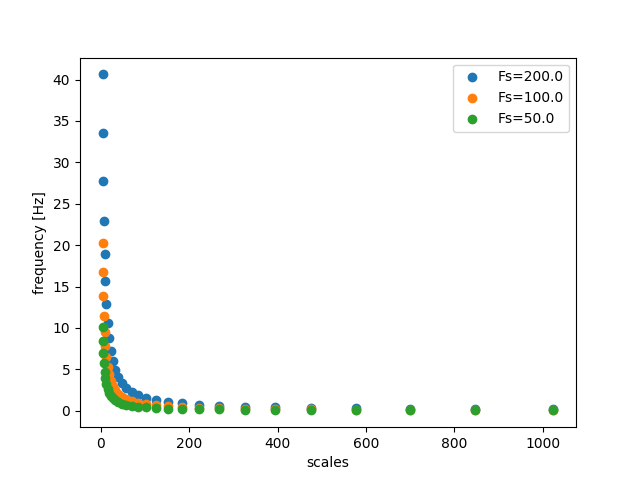

In [37]:
fig = plt.figure()
for freq, fs in zip(freq_lists, fs_list):
    plt.scatter(goto_scales, freq, label =f'Fs={fs}' )
plt.xlabel('scales')
plt.ylabel('frequency [Hz]')
plt.legend()
    

In [32]:
# plt.close('all')